In [1]:
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import ast
import sys
statistics_path = os.path.abspath("../")
sys.path.append(statistics_path)
import stats_utils

In [2]:
path_to_exp_statistics = "/Users/admin/Desktop/thesis/dataset/metrics/"

In [3]:
exp_name = "xiaomi_1"
df = stats_utils.parse_experiments_statistics_to_df(path_to_exp_statistics, exp_name, csv_filename="logs.csv")

In [4]:
df.head()

,n_round,timestamp,devices_names,n_samples,y_true,y_pred,accuracy,energy_before,energy_after,training_time,training_without_compile_times,avg_rssi,latency,download_speed,upload_speed,rx_data,tx_data
0,1,2025:04:07_22:17:12,['Xiaomi M2006C3MNG'],18840,"{""Xiaomi M2006C3MNG"": [1.0, 2.0, 4.0, 3.0, 4.0...","{""Xiaomi M2006C3MNG"": [1.0, 2.0, 4.0, 3.0, 4.0...",{'Xiaomi M2006C3MNG': 0.91056263},"{""Xiaomi M2006C3MNG"": ""{ Temperature = 22 C, C...","{""Xiaomi M2006C3MNG"": ""{ Temperature = 22 C, C...",62.934548,49.995397,"{""Xiaomi M2006C3MNG"": ""-54""}","{""Xiaomi M2006C3MNG"": ""48""}","{""Xiaomi M2006C3MNG"": ""-1.0""}","{""Xiaomi M2006C3MNG"": ""-1.0""}","{""Xiaomi M2006C3MNG"": ""66516""}","{""Xiaomi M2006C3MNG"": ""14860""}"


In [14]:
y_true = df['y_true'].apply(json.loads).values[0]
y_pred = df['y_pred'].apply(json.loads).values[0]

In [15]:
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.84       406
         1.0       0.52      0.49      0.51       377
         2.0       0.69      0.45      0.55       354
         3.0       0.58      0.88      0.70       369
         4.0       0.67      0.25      0.36       284
         5.0       0.67      0.71      0.69       270

    accuracy                           0.64      2060
   macro avg       0.65      0.63      0.61      2060
weighted avg       0.65      0.64      0.62      2060

[[391   1   3   0  10   1]
 [110 186  67   0   4  10]
 [ 24 170 159   0   1   0]
 [  0   0   0 326  14  29]
 [  0   0   0 160  70  54]
 [  0   0   0  72   5 193]]


In [20]:
df.columns

Index(['idx', 'timestamp', 'clients', 'n_samples', 'y_true', 'y_pred',
       'accuracy', 'mean_accuracy', 'energy_before', 'energy_after',
       'training_time', 'training_without_compile_times'],
      dtype='object')

In [40]:
for a, row in df.iterrows():
    print(row)
    break

n_round                                                                           1
timestamp                                                       2025:03:25_20:54:42
devices_names                                                    ['realme RMX3370']
n_samples                                                                      2060
y_true                            [3.0, 0.0, 2.0, 2.0, 3.0, 3.0, 3.0, 1.0, 5.0, ...
y_pred                            [3.0, 0.0, 1.0, 1.0, 3.0, 3.0, 3.0, 0.0, 5.0, ...
accuracy                                             {'realme RMX3370': 0.59126216}
energy_before                     {'realme RMX3370': '{"Temperature": "26.8 C", ...
energy_after                      {'realme RMX3370': '{"Temperature": "26.8 C", ...
training_time                                                               17.7031
training_without_compile_times                                             0.565471
Name: 0, dtype: object


In [80]:
def read_statistics(df):    
    # 1. get model score
    # we will use the last iter to get the model score
    y_true = df['y_true'].apply(json.loads).values[-1]
    y_pred = df['y_pred'].apply(json.loads).values[-1]
#     print(classification_report(y_true, y_pred))
#     print(confusion_matrix(y_true, y_pred))
    
    # 2. get training time
    total_training_time = df['training_time'].values.sum()
    total_training_time_without_compiling = df['training_without_compile_times'].values.sum()
#     plt.figure()
#     plt.stem(df['training_time'].values, use_line_collection=True)
#     plt.figure()
#     plt.stem(df['training_without_compile_times'].values, use_line_collection=True)
    
    # 3. collect energy statistics
    # Get the first energy entry
    energy_str = df['energy_before'].values[0]
    print(energy_str)
    # Step 1: Fix outer dictionary format (single quotes to double quotes)
    energy_str_fixed = energy_str.replace("'", '"')  

    # Step 2: Convert outer dictionary to JSON
    try:
        energy_dict = json.loads(energy_str_fixed)  # Parse JSON
    except json.JSONDecodeError as e:
        print("Error decoding outer JSON:", e)
        return
    
    # Step 3: Extract inner JSON string
    inner_json_str = next(iter(energy_dict.values()))

    # Step 4: Convert inner JSON
    try:
        energy_data = json.loads(inner_json_str)  # Parse inner JSON
    except json.JSONDecodeError as e:
        print("Error decoding inner JSON:", e)
        return

    # Step 5: Extract attributes
    temperature = energy_data.get("Temperature", "N/A")
    current_now = energy_data.get("CurrentNow", "N/A")
    current_avg = energy_data.get("CurrentAverage", "N/A")
    capacity = energy_data.get("Capacity", "N/A")
    voltage = energy_data.get("Voltage", "N/A")
    charge_counter = energy_data.get("ChargeCounter", "N/A")

    # Print results
    print(f"Temperature: {temperature}")
    print(f"Current Now: {current_now}")
    print(f"Current Average: {current_avg}")
    print(f"Capacity: {capacity}")
    print(f"Voltage: {voltage}")
    print(f"Charge Counter: {charge_counter}")

In [81]:
read_statistics(df)

{'realme RMX3370': '{"Temperature": "26.8 C", "CurrentNow": "-78 uA", "CurrentAverage": "-2147483648 uA", "Capacity": "48 %", "Voltage": "3907 mV", "ChargeCounter": "1808000 uAH"}'}
Error decoding outer JSON: Expecting ',' delimiter: line 1 column 23 (char 22)


In [72]:
#energy = df['energy_before'].apply(json.loads).values[0]

In [73]:
energy = df['energy_before'].values[0]

In [74]:
energy

'{\'realme RMX3370\': \'{"Temperature": "26.8 C", "CurrentNow": "-78 uA", "CurrentAverage": "-2147483648 uA", "Capacity": "48 %", "Voltage": "3907 mV", "ChargeCounter": "1808000 uAH"}\'}'

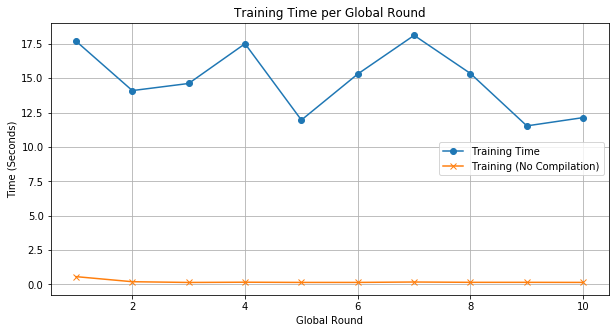

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df['n_round'], df['training_time'], label="Training Time", marker="o")
plt.plot(df['n_round'], df['training_without_compile_times'], label="Training (No Compilation)", marker="x")
plt.xlabel("Global Round")
plt.ylabel("Time (Seconds)")
plt.title("Training Time per Global Round")
plt.legend()
plt.grid(True)
#plt.savefig(os.path.join(output_dir, "training_time_plot.png"))
#plt.close()

Text(0.5, 1, 'Confusion Matrix')

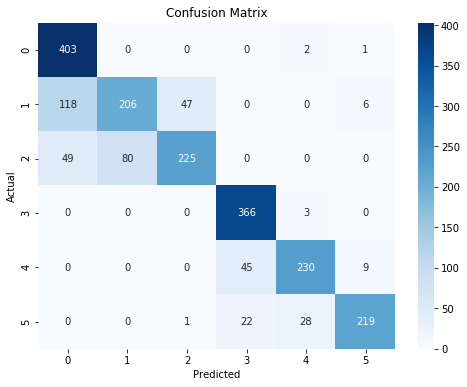

In [12]:
y_true = json.loads(df['y_true'].iloc[-1])  # Convert JSON string to list
y_pred = json.loads(df['y_pred'].iloc[-1])

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
# plt.savefig(os.path.join(output_dir, "confusion_matrix.png"))
# plt.close()

In [39]:
def generate_training_time_plot(df):
    """
    Generates a line plot showing training time per global round.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(df['n_round'], df['training_time'], label="Training Time", marker="o", linestyle="-")
    plt.plot(df['n_round'], df['training_without_compile_times'], label="Training (No Compilation)", marker="x", linestyle="--")

    total_time = df['training_time'].sum()
    total_time_no_compile = df['training_without_compile_times'].sum()

    plt.xlabel("Global Round")
    plt.ylabel("Time (Seconds)")
    plt.title(f"Training Time per Global Round\n(Total: {total_time:.2f} sec | No Compilation: {total_time_no_compile:.2f} sec)")
    plt.legend()
    plt.grid(True)

#     plt.savefig(os.path.join(output_dir, "training_time_plot.png"), dpi=300)
#     plt.close()
#     print(f"Training time plot saved at: {output_dir}/training_time_plot.png")

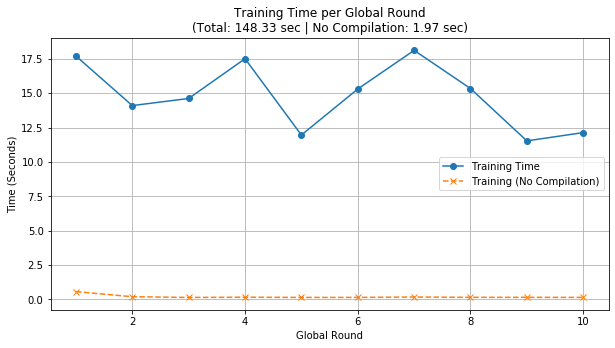

In [40]:
generate_training_time_plot(df)

In [37]:
def generate_performance_scores_plot(y_true, y_pred):
    # global model accuracy scores
    cm = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, output_dict=True)

    # Extract metrics and format into DataFrame
    metrics_df = pd.DataFrame(class_report).T.round(2)

    # Extract global metrics
    accuracy = class_report["accuracy"]
    macro_avg = metrics_df.loc["macro avg"]
    weighted_avg = metrics_df.loc["weighted avg"]

    # Create a combined figure
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ### Left: Confusion Matrix ###
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax[0])
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")

    ### Right: Classification Report ###
    report_text = ""
    for label in metrics_df.index[:-3]:  # Exclude last 3 rows (macro avg, weighted avg, accuracy)
        report_text += (
            f"Class {label} → "
            f"Precision: {metrics_df.loc[label, 'precision']:.2f} | "
            f"Recall: {metrics_df.loc[label, 'recall']:.2f} | "
            f"F1-score: {metrics_df.loc[label, 'f1-score']:.2f} | "
            f"Support: {int(metrics_df.loc[label, 'support'])}\n"
        )
    report_text += f"\nOverall Accuracy: {accuracy:.2%}"
    report_text += f"\nMacro Avg    → Precision: {macro_avg['precision']:.2f} | Recall: {macro_avg['recall']:.2f} | F1-score: {macro_avg['f1-score']:.2f} | Support: {int(macro_avg['support'])}\n"
    report_text += f" Weighted Avg → Precision: {weighted_avg['precision']:.2f} | Recall: {weighted_avg['recall']:.2f} | F1-score: {weighted_avg['f1-score']:.2f} | Support: {int(weighted_avg['support'])}\n"

    # Display report text
    ax[1].text(0, 0.5, report_text, fontsize=12, va="center", ha="left", family="monospace", wrap=True)
    ax[1].set_axis_off()

    # Save combined image
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.close()

In [118]:
def generate_performance_scores_plot(y_true, y_pred, label_names, output_path="performance_scores.png"):
    # Compute confusion matrix and classification report
    cm = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, output_dict=True)

    # Convert classification report to DataFrame and round values
    metrics_df = pd.DataFrame(class_report).T.round(2)

    # Extract global metrics
    accuracy = class_report["accuracy"]
    macro_avg = metrics_df.loc["macro avg"]
    weighted_avg = metrics_df.loc["weighted avg"]

    # Create a combined figure
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ### Left: Confusion Matrix with Label Names ###
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax[0], xticklabels=label_names, yticklabels=label_names)
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")

    ### Right: Classification Report Text ###
    report_text = ""
    for label in metrics_df.index[:-3]:  # Exclude last 3 rows (macro avg, weighted avg, accuracy)
        try:
            class_name = label_names[int(float(label))]  # Convert to float first, then int
        except (ValueError, IndexError):
            class_name = label  # Use default label if conversion fails
        
        report_text += (
            f"{class_name} → "
            f"Precision: {metrics_df.loc[label, 'precision']:.2f} | "
            f"Recall: {metrics_df.loc[label, 'recall']:.2f} | "
            f"F1-score: {metrics_df.loc[label, 'f1-score']:.2f} | "
            f"Support: {int(metrics_df.loc[label, 'support'])}\n"
        )
    
    report_text += f"\nOverall Accuracy: {accuracy:.2%}"
    report_text += f"\nMacro Avg    → Precision: {macro_avg['precision']:.2f} | Recall: {macro_avg['recall']:.2f} | F1-score: {macro_avg['f1-score']:.2f} | Support: {int(macro_avg['support'])}\n"
    report_text += f"Weighted Avg → Precision: {weighted_avg['precision']:.2f} | Recall: {weighted_avg['recall']:.2f} | F1-score: {weighted_avg['f1-score']:.2f} | Support: {int(weighted_avg['support'])}\n"

    # Display classification report text
    ax[1].text(0, 0.5, report_text, fontsize=12, va="center", ha="left", family="monospace", wrap=True)
    ax[1].set_axis_off()

    # Save the combined image
#     plt.tight_layout()
#     plt.savefig(output_path, dpi=300)
#     plt.close()

    print(f"Performance scores plot saved at: {output_path}")

Performance scores plot saved at: performance_scores.png


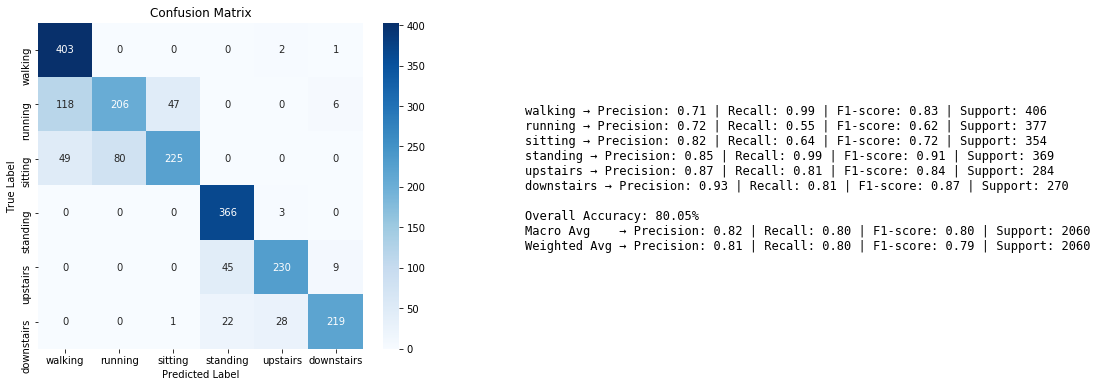

In [119]:
label_names = ['walking', 'running', 'sitting', 'standing', 'upstairs', 'downstairs']
y_true = json.loads(df['y_true'].iloc[-1])
y_pred = json.loads(df['y_pred'].iloc[-1])
generate_performance_scores_plot(y_true, y_pred, label_names)

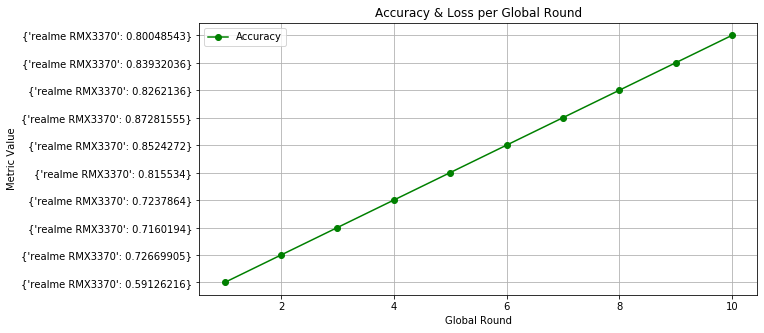

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df['n_round'], df['accuracy'], label="Accuracy", marker="o", color="green")
# plt.plot(df['n_round'], df['loss'], label="Loss", marker="x", color="red")
plt.xlabel("Global Round")
plt.ylabel("Metric Value")
plt.title("Accuracy & Loss per Global Round")
plt.legend()
plt.grid(True)
# plt.savefig(os.path.join(output_dir, "accuracy_loss_plot.png"))
# plt.close()

In [16]:
general_stats = {
    "total_global_rounds": len(df),
    "total_clients": len(set(df['devices_names'].explode())),
    "clients_per_round": df[['n_round', 'devices_names']].to_dict(orient="records"),
    "total_test_samples": df['n_samples'].sum()
}
# with open(os.path.join(output_dir, "model_evaluation.json"), "w") as f:
#     json.dump(general_stats, f, indent=4)

In [17]:
general_stats

{'total_global_rounds': 10,
 'total_clients': 1,
 'clients_per_round': [{'n_round': 1, 'devices_names': "['realme RMX3370']"},
  {'n_round': 2, 'devices_names': "['realme RMX3370']"},
  {'n_round': 3, 'devices_names': "['realme RMX3370']"},
  {'n_round': 4, 'devices_names': "['realme RMX3370']"},
  {'n_round': 5, 'devices_names': "['realme RMX3370']"},
  {'n_round': 6, 'devices_names': "['realme RMX3370']"},
  {'n_round': 7, 'devices_names': "['realme RMX3370']"},
  {'n_round': 8, 'devices_names': "['realme RMX3370']"},
  {'n_round': 9, 'devices_names': "['realme RMX3370']"},
  {'n_round': 10, 'devices_names': "['realme RMX3370']"}],
 'total_test_samples': 20600}

In [102]:
def generate_general_stats(df, output_dir):
    df_copy = df.copy()
    total_global_rounds = len(df_copy)
    
    # Convert string representation of lists into actual lists
    df_copy['devices_names'] = df_copy['devices_names'].apply(ast.literal_eval)
    
    total_clients = len(set(df_copy['devices_names'].explode()))
    total_test_samples = df_copy['n_samples'].sum()

    # Format clients per round in a clear way
    clients_per_round = "\n".join([
        f"  - Round {row['n_round']}: {', '.join(row['devices_names'])}"
        for _, row in df.iterrows()
    ])

    # Prepare content
    stats_text = (
        f"Federated Learning Experiment Summary\n"
        f"======================================\n"
        f"Total Global Rounds: {total_global_rounds}\n"
        f"Total Clients Involved: {total_clients}\n"
        f"Total Test Samples Processed: {total_test_samples}\n\n"
        f"Clients per Global Round:\n"
        f"{clients_per_round}"
    )

    # Save as .txt
    output_path = os.path.join(output_dir, "general_stats.txt")
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(stats_text)

    print(f"General statistics saved at: {output_path}")

In [106]:
def generate_general_stats(df, output_dir):
    df_copy = df.copy()
    total_global_rounds = len(df)
    
    # Convert string representation of lists into actual lists
    df_copy['devices_names'] = df_copy['devices_names'].apply(ast.literal_eval)
    
    total_clients = len(set(df['devices_names'].explode()))
    total_test_samples = df['n_samples'].sum()

    # Calculate the total training time (with and without compilation)
    total_training_time = df_copy['training_time'].sum()
    total_training_time_without_compiling = df_copy['training_without_compile_times'].sum()

    # Convert to minutes
    total_training_time_minutes = total_training_time / 60
    total_training_time_without_compiling_minutes = total_training_time_without_compiling / 60

    # Format clients per round in a clear way
    clients_per_round = "\n".join([
        f"  - Round {row['n_round']}: {', '.join(row['devices_names'])}"
        for _, row in df.iterrows()
    ])

    # Prepare content for the stats text
    stats_text = (
        f"Federated Learning Experiment Summary\n"
        f"======================================\n"
        f"Total Global Rounds: {total_global_rounds}\n"
        f"Total Clients Involved: {total_clients}\n"
        f"Total Test Samples Processed: {total_test_samples}\n\n"
        f"Total Training Time (including compilation): {total_training_time:.2f} seconds ({total_training_time_minutes:.2f} minutes)\n"
        f"Total Training Time (excluding compilation): {total_training_time_without_compiling:.2f} seconds ({total_training_time_without_compiling_minutes:.2f} minutes)\n\n"
        f"Clients per Global Round:\n"
        f"{clients_per_round}"
    )

    # Save as .txt file
    output_path = os.path.join(output_dir, "general_stats.txt")
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(stats_text)

    print(f"General statistics saved at: {output_path}")

In [108]:
def generate_general_stats(df, output_dir):
    df_copy = df.copy()
    total_global_rounds = len(df_copy)

    # Convert string representation of lists into actual lists
    def clean_devices_names(devices):
        try:
            # If devices is a string that looks like a list, convert it
            if isinstance(devices, str):
                parsed_devices = ast.literal_eval(devices)
                if isinstance(parsed_devices, list):
                    return parsed_devices
            return devices  # Return as-is if already a list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails

    df_copy['devices_names'] = df_copy['devices_names'].apply(clean_devices_names)

    total_clients = len(set(df_copy['devices_names'].explode()))
    total_test_samples = df_copy['n_samples'].sum()

    # Calculate the total training time (with and without compilation)
    total_training_time = df_copy['training_time'].sum()
    total_training_time_without_compiling = df_copy['training_without_compile_times'].sum()

    # Convert to minutes
    total_training_time_minutes = total_training_time / 60
    total_training_time_without_compiling_minutes = total_training_time_without_compiling / 60

    # Format clients per round in a clear way
    clients_per_round = "\n".join([
        f"  - Round {row['n_round']}: {', '.join(map(str, row['devices_names']))}"
        for _, row in df_copy.iterrows()
    ])

    # Prepare content for the stats text
    stats_text = (
        f"Federated Learning Experiment Summary\n"
        f"======================================\n"
        f"Total Global Rounds: {total_global_rounds}\n"
        f"Total Clients Involved: {total_clients}\n"
        f"Total Test Samples Processed: {total_test_samples}\n\n"
        f"Total Training Time (including compilation): {total_training_time:.2f} seconds ({total_training_time_minutes:.2f} minutes)\n"
        f"Total Training Time (excluding compilation): {total_training_time_without_compiling:.2f} seconds ({total_training_time_without_compiling_minutes:.2f} minutes)\n\n"
        f"Clients per Global Round:\n"
        f"{clients_per_round}"
    )

    # Save as .txt file
    output_path = os.path.join(output_dir, "general_stats.txt")
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(stats_text)

    print(f"General statistics saved at: {output_path}")

In [111]:
generate_general_stats(df, "/Users/admin/Desktop")

General statistics saved at: /Users/admin/Desktop/general_stats.txt


In [ ]:
def prepare_experiment_directory(base_path, experiment_name):
    """
    Prepares the experiment directory by creating it if necessary and 
    deleting old log files if they exist.
    
    Args:
        base_path (str): The path where the experiment directory should be created.
        experiment_name (str): The name of the experiment.
    
    Returns:
        str: The full path to the experiment directory.
    """
    # Create the full experiment directory path
    experiment_dir = os.path.join(base_path, experiment_name)
    
    # Create the directory if it doesn't exist
    os.makedirs(experiment_dir, exist_ok=True)

    # Define the list of files to check and remove if they exist
    files_to_remove = ["performance_scores.png", "training_time_plot.png", "general_stats.txt"]

    for filename in files_to_remove:
        file_path = os.path.join(experiment_dir, filename)
        if os.path.exists(file_path):
            os.remove(file_path)  # Delete the file

    print(f"Experiment directory prepared: {experiment_dir}")
    return experiment_dir

In [9]:
def load_labels(filename):
    """
    Loads class labels from the 'labels.txt' file.

    Args:
        filename (str): The name of the directory containing 'labels.txt'.

    Returns:
        list: A list of class labels, or an empty list if the file does not exist.
    """

    # Get path to working data from config file
    path_to_config = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "config.txt")
    with open(path_to_config, 'r') as file:
        path_to_working_data = file.readline().split(" ")[0]

    labels_path = os.path.join(path_to_working_data, filename, 'labels.txt')

    # Check if file exists
    if not os.path.exists(labels_path):
        print(f"Warning: Labels file not found at {labels_path}. Returning an empty list.")
        return []

    # Read labels
    with open(labels_path, 'r', encoding='utf-8') as f:
        labels = [line.strip() for line in f.readlines()]

    return labels

In [10]:
temp = load_labels("dataset_1_experiment_1")

In [11]:
temp

['Running', 'Sitting', 'Standing', 'Walking', 'downstaires', 'upstaires']

In [12]:
path_to_exp_directory = "/Users/admin/Desktop/thesis/dataset/metrics/exp1"
csv_filename = "logs.csv"

full_path = os.path.join(path_to_exp_directory, csv_filename)
print(full_path)

/Users/admin/Desktop/thesis/dataset/metrics/exp1/logs.csv
